# Question 2 - Heatmap - Group 11

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mlt 
import matplotlib.pyplot as plt

from matplotlib.cm import get_cmap
from matplotlib.patches import Patch

In [2]:
df = pd.read_csv('HRDataset_v14.csv')
df['Dummy'] = np.ones(311)
df=df[['RaceDesc','Department','Sex','Dummy']]
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [3]:
dfa=df[df['RaceDesc']=='Asian'].reset_index()
dfa['Department'].unique()
new_row = {'RaceDesc':'Asian', 'Department':'Admin Offices', 'F':0, 'M':0}

In [4]:
grouped = df.groupby(by=['RaceDesc','Department'])['Sex'].count().unstack()
grouped.to_csv('ques2.csv')
grouped = pd.read_csv('ques2.csv')
data = grouped.drop('RaceDesc',axis=1)
data=data.to_numpy(copy=True)

In [5]:
grouped

,RaceDesc,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering
0,American Indian or Alaska Native,NaN,NaN,NaN,2.0,1.0,NaN
1,Asian,NaN,NaN,6.0,21.0,1.0,1.0
2,Black or African American,5.0,NaN,15.0,45.0,10.0,5.0
3,Hispanic,NaN,NaN,NaN,1.0,NaN,NaN
4,Two or more races,NaN,NaN,NaN,6.0,5.0,NaN
5,White,4.0,1.0,29.0,134.0,14.0,5.0


In [6]:
dept = list(grouped)
dept[1:]

['Admin Offices',
 'Executive Office',
 'IT/IS',
 'Production       ',
 'Sales',
 'Software Engineering']

In [7]:
race = list(grouped['RaceDesc'].values)

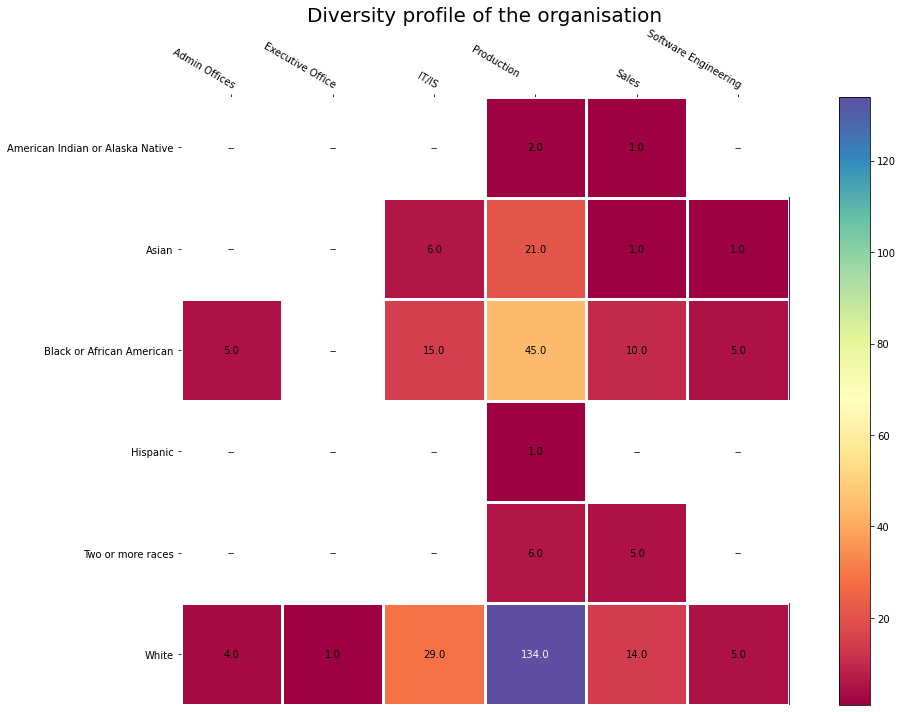

In [9]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=( "black",  "white"),
                     threshold=None, **textkw):
   
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mlt.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
ax.grid(False)
im, cbar = heatmap(data, race, dept[1:], ax=ax,
                   cmap="Spectral", cbarlabel="")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
plt.title("Diversity profile of the organisation" ,fontsize=20,
          color="black", loc="center")
fig.tight_layout()
plt.savefig('Second.png')
plt.show()